In [ ]:
!pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
pip install opencv-python


In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()


In [ ]:
# import os

# mountpoint = '/content/drive'

# if os.path.exists(mountpoint) and os.listdir(mountpoint):
#   print("Mountpoint already exists and contains files.")
# else:
#   print("Mountpoint is either empty or does not exist.")

In [ ]:
# if os.path.exists(mountpoint) and os.listdir(mountpoint):
#   !rm -rf {mountpoint}/*

In [ ]:
# drive.mount(mountpoint)

In [ ]:
!ls {mountpoint}

MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Specifying the main dataset path in drive to set it for further processing

In [ ]:
# Specify the main dataset path
dataset_path = '/content/drive/MyDrive/Dataset'

In [ ]:
import os

# Define the path to your dataset directory
dataset_path = '/content/drive/MyDrive/Dataset'

# Loop through each category folder
for category_folder in os.listdir(dataset_path):
    category_folder_path = os.path.join(dataset_path, category_folder)

    # Loop through each file in the category folder
    for file_name in os.listdir(category_folder_path):
        file_path = os.path.join(category_folder_path, file_name)

        # Check if the file is an image file and if it doesn't end with '.png'
        if file_name.endswith('.png'):
            continue  # Skip valid .png files
        else:
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")


Importing all libraries

In [ ]:
import os                       #os: For interacting with the operating system.
import matplotlib.pyplot as plt #matplotlib.pyplot: For plotting images.
import numpy as np              #numpy: For numerical operations.
import seaborn as sns           #seaborn for statistical data visualization.
import tensorflow as tf         #tensorflow: Deep learning library.
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.optimizers import Adam
import segmentation_models_pytorch as smp
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#compute_class_weight from sklearn.utils.class_weight: For computing class weights.

import cv2


from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Dense,Activation,Flatten,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



In [ ]:
np.random.seed(12049)

 List all directories (subfolders) in the dataset_path

In [ ]:
# List all directories (subfolders) in the dataset_path
subfolders = [f.name for f in os.scandir(dataset_path) if f.is_dir()]

print("Subfolders in the dataset:")
print(subfolders)

Subfolders in the dataset:
['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']


# Count number of images in each subfolder

In [ ]:
# Count number of images in each subfolder
for folder in subfolders:
    folder_path = os.path.join(dataset_path, folder)
    num_images = len(os.listdir(folder_path))
    print(f"Number of images in {folder}: {num_images}")

Number of images in 0Normal: 504
Number of images in 1Doubtful: 502
Number of images in 2Mild: 438
Number of images in 3Moderate: 404
Number of images in 4Severe: 412


# Assigning labels to each subfolder

In [ ]:
categories = os.listdir(dataset_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories, labels))  # empty dictionary
print("Label Dictionary:")
print(label_dict)
print("Categories:")
print(categories)
print("Labels:")
print(labels)

Label Dictionary:
{'0Normal': 0, '1Doubtful': 1, '2Mild': 2, '3Moderate': 3, '4Severe': 4}
Categories:
['0Normal', '1Doubtful', '2Mild', '3Moderate', '4Severe']
Labels:
[0, 1, 2, 3, 4]


# Reading images, Converting them to grayscale, Resizing them, and preparing them along with their labels

In [ ]:

img_size = 256
data_before_resize = []
data_after_resize = []
label = []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        try:
            # Preprocessing steps before resizing
            data_before_resize.append(img)


            # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            resized = cv2.resize(gray, (img_size, img_size))

            # Append preprocessed image and label to lists
            data_after_resize.append(resized)
            label.append(label_dict[category])

        except Exception as e:
            print('Exception:', e)



# img_size = 256
# data_before_resize = []
# data_after_resize = []
# label = []

# for category in categories:
#     folder_path = os.path.join(dataset_path, category)
#     img_names = os.listdir(folder_path)

#     for img_name in img_names:
#         img_path = os.path.join(folder_path, img_name)
#         img = cv2.imread(img_path)
#         try:
#             if img is not None:  # Check if the image is loaded successfully
#                 # Preprocessing steps before resizing
#                 data_before_resize.append(img)

#                 # Preprocessing steps
#                 # Convert to grayscale
#                 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                 # Resize
#                 resized = cv2.resize(gray, (img_size, img_size))

#                 # Append preprocessed image and label to lists
#                 data_after_resize.append(resized)
#                 label.append(label_dict[category])
#             else:
#                 print(f"Failed to load image: {img_path}")

#         except Exception as e:
#             print('Exception:', e)


In [ ]:

# num_images_to_display = 5
# fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 6))


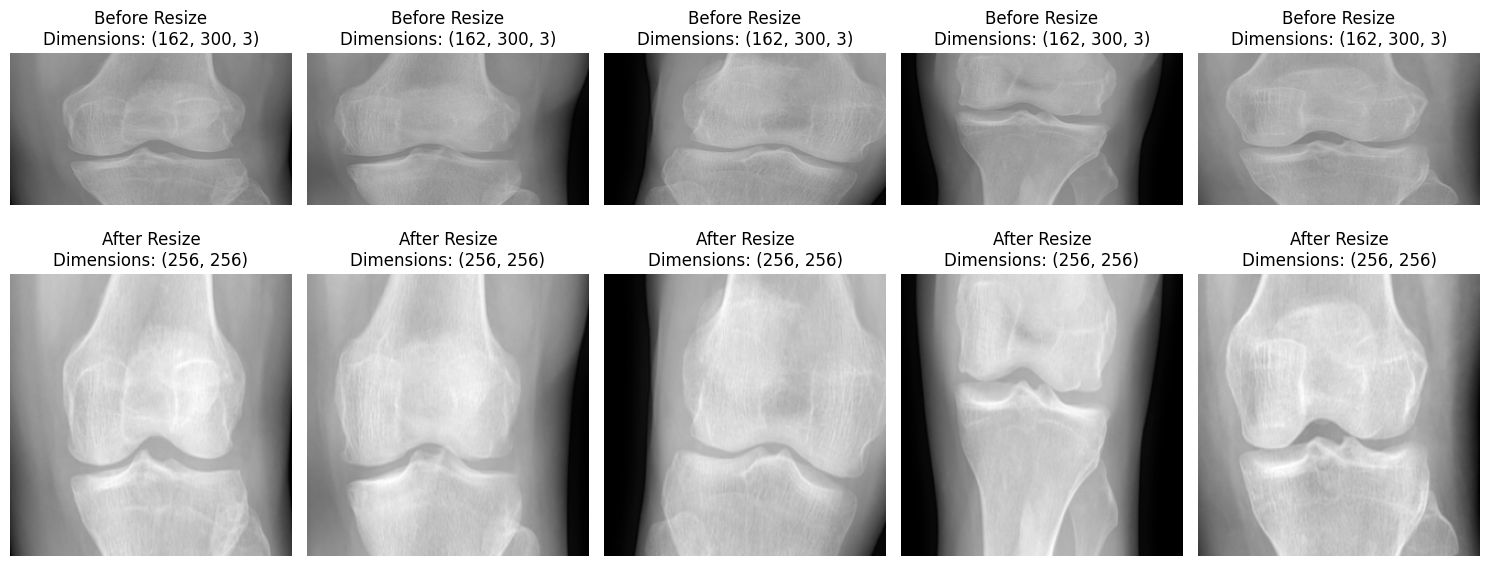

In [ ]:
# Display images and their dimensions
num_images_to_display = 5  # Number of images to display
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 6))

for i in range(num_images_to_display):
    axes[0, i].imshow(cv2.cvtColor(data_before_resize[i], cv2.COLOR_BGR2RGB))
    axes[0, i].axis('off')  # Turn off axis
    axes[0, i].set_title(f"Before Resize\nDimensions: {data_before_resize[i].shape}")

    axes[1, i].imshow(data_after_resize[i], cmap='gray')
    axes[1, i].axis('off')  # Turn off axis
    axes[1, i].set_title(f"After Resize\nDimensions: {data_after_resize[i].shape}")

plt.tight_layout()
plt.show()

In [ ]:
print(type(img))

<class 'numpy.ndarray'>


# Normalization

In [ ]:
import numpy as np

# Normalization
data_after_resize = np.array(data_after_resize) / 255.0

In [ ]:
# Check mean and standard deviation of the normalized data
mean_value = np.mean(data_after_resize)
std_deviation = np.std(data_after_resize)

print("Mean:", mean_value)
print("Standard Deviation:", std_deviation)

Mean: 0.7091601616248648
Standard Deviation: 0.3248939312552454


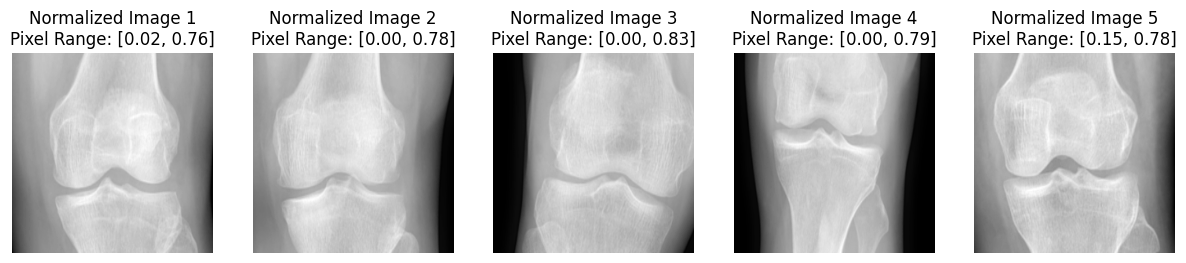

In [ ]:
# Display normalized images and their pixel value range-updated
num_images_to_display = 5  # Number of images to display
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    axes[i].imshow(data_after_resize[i], cmap='gray')
    axes[i].axis('off')  # Turn off axis
    axes[i].set_title(f"Normalized Image {i+1}\nPixel Range: [{np.min(data_after_resize[i]):.2f}, {np.max(data_after_resize[i]):.2f}]")

plt.show()

In [ ]:
import numpy as np
import cv2

# Assuming 'data_after_resize' contains the resized grayscale images
# 'data_after_resize' shape: (num_images, img_size, img_size)

# Define the kernel size for Gaussian blurring
kernel_size = (5, 5)

# Create an empty list to store the preprocessed images
data_after_blur = []

# Apply Gaussian blurring to each resized grayscale image
for img in data_after_resize:
    # Apply Gaussian blurring
    blurred_img = cv2.GaussianBlur(img, kernel_size, 0)

    # Normalize the pixel values to the range [0, 1]
    blurred_img_normalized = blurred_img.astype(np.float32) / 255.0

    # Append the preprocessed image to the list
    data_after_blur.append(blurred_img_normalized)




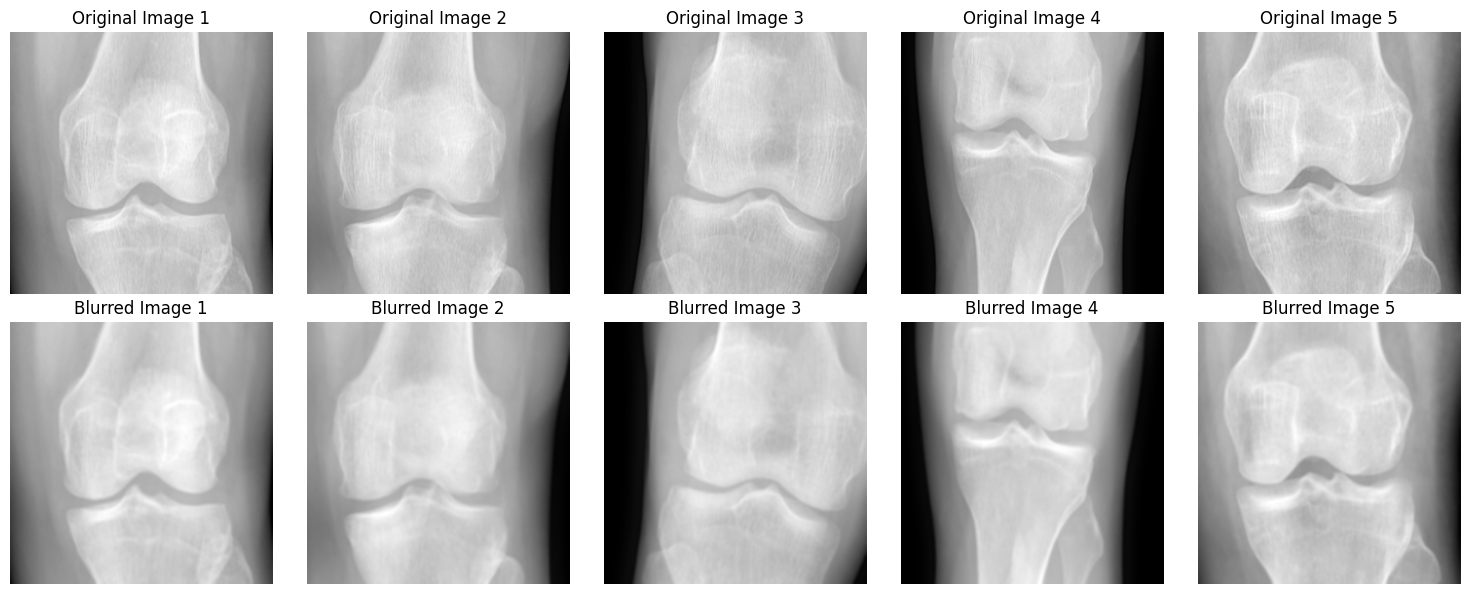

In [ ]:
  # Display a sample of original and blurred images
num_images_to_display = 5  # Number of images to display
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 6))

for i in range(num_images_to_display):
    axes[0, i].imshow(data_after_resize[i], cmap='gray')
    axes[0, i].axis('off')  # Turn off axis
    axes[0, i].set_title(f"Original Image {i+1}")

    axes[1, i].imshow(data_after_blur[i], cmap='gray')
    axes[1, i].axis('off')  # Turn off axis
    axes[1, i].set_title(f"Blurred Image {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import os

# Loop through each directory in the dataset directory
for category_folder in os.listdir(dataset_path):
    category_folder_path = os.path.join(dataset_path, category_folder)

    # Check if the item is a directory
    if os.path.isdir(category_folder_path):
        # Loop through each file in the current directory
        for filename in os.listdir(category_folder_path):
            img_path = os.path.join(category_folder_path, filename)
            try:
                img = Image.open(img_path)
                print(f"Image {img_path} can be opened successfully with Pillow")
            except Exception as e:
                print(f"Error opening image {img_path} with Pillow: {e}")
    else:
        print(f"Skipping {category_folder_path} as it is not a directory")


Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (1).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (3).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (4).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (61).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (2).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (18).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (22).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (29).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (5).png can be opened successfully with Pillow
Image /content/drive/MyDrive/Dataset/0Normal/0_0_No

In [ ]:
# Loop through each directory in the dataset directory
for category_folder in os.listdir(dataset_path):
    category_folder_path = os.path.join(dataset_path, category_folder)

    # Print the current directory path
    print(f"Contents of directory {category_folder_path}:")

    # Loop through each item in the current directory
    for item in os.listdir(category_folder_path):
        item_path = os.path.join(category_folder_path, item)
        print(item_path)


Contents of directory /content/drive/MyDrive/Dataset/0Normal:
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (1).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (3).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (4).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (61).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (2).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (18).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (22).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (29).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (5).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (35).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (33).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (6).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (38).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (40).png
/content/drive/MyDrive/Dataset/0Normal/0_0_NormalG0 (41).png
/content/drive/MyDrive/Datase

In [ ]:
import cv2
import os
import numpy as np

# Define the path to your dataset directory
dataset_path = '/content/drive/MyDrive/Dataset'

# Initialize variables
img_size = (224, 224)  # Define the desired size for resizing the images
data_after_resize = []  # List to store preprocessed images

# Iterate through each category folder in the dataset directory
for category_folder in os.listdir(dataset_path):
    # Construct the full path to the category folder
    category_folder_path = os.path.join(dataset_path, category_folder)

    # Check if the path is a directory
    if os.path.isdir(category_folder_path):
        # Iterate through each file in the category folder
        for filename in os.listdir(category_folder_path):
            # Construct the full path to the image file
            img_path = os.path.join(category_folder_path, filename)

            try:
                # Attempt to load the image
                img = cv2.imread(img_path)

                # Check if the image was loaded successfully
                if img is not None:
                    # Perform preprocessing steps
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    resized = cv2.resize(gray, img_size)
                    resized_normalized = resized.astype(np.float32) / 255.0
                    data_after_resize.append(resized_normalized)
                else:
                    print(f"Error: Unable to load image at {img_path}")

            except Exception as e:
                # Print detailed error information
                print(f"Error loading image at {img_path}: {e}")

# Convert the list of preprocessed images to a numpy array
data_after_resize = np.array(data_after_resize)


In [ ]:
if img is None:
    print(f"Error: Unable to load image at {dataset_path}")
else:
    # Perform preprocessing steps
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, img_size)  # Remove the extra tuple wrapping img_size
    resized_normalized = resized.astype(np.float32) / 255.0
    if len(data_after_resize) == 0:
        data_after_resize = np.expand_dims(resized_normalized, axis=0)  # Add a batch dimension
    else:
        data_after_resize = np.concatenate((data_after_resize, np.expand_dims(resized_normalized, axis=0)), axis=0)




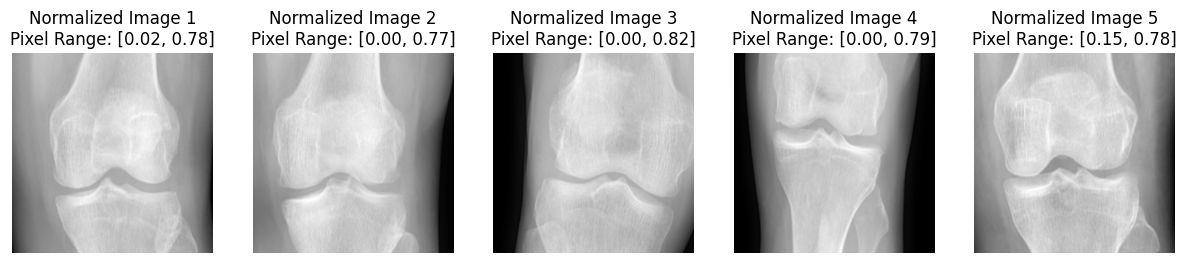

In [ ]:
# Display normalized images and their pixel value range
num_images_to_display = 5  # Number of images to display
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    axes[i].imshow(data_after_resize[i], cmap='gray')
    axes[i].axis('off')  # Turn off axis
    axes[i].set_title(f"Normalized Image {i+1}\nPixel Range: [{np.min(data_after_resize[i]):.2f}, {np.max(data_after_resize[i]):.2f}]")

plt.show()


# Noise Reduction

In [ ]:
import numpy as np
import cv2

# Assuming 'data_after_resize' contains the resized grayscale images
# 'data_after_resize' shape: (num_images, img_size, img_size)

# Define the kernel size for Gaussian blurring
kernel_size = (5, 5)

# Create an empty list to store the preprocessed images
data_after_blur = []

# Apply Gaussian blurring to each resized grayscale image
for img in data_after_resize:
    # Apply Gaussian blurring
    blurred_img = cv2.GaussianBlur(img, kernel_size, 0)

    # Normalize the pixel values to the range [0, 1]
    blurred_img_normalized = blurred_img.astype(np.float32) / 255.0

    # Append the preprocessed image to the list
    data_after_blur.append(blurred_img_normalized)




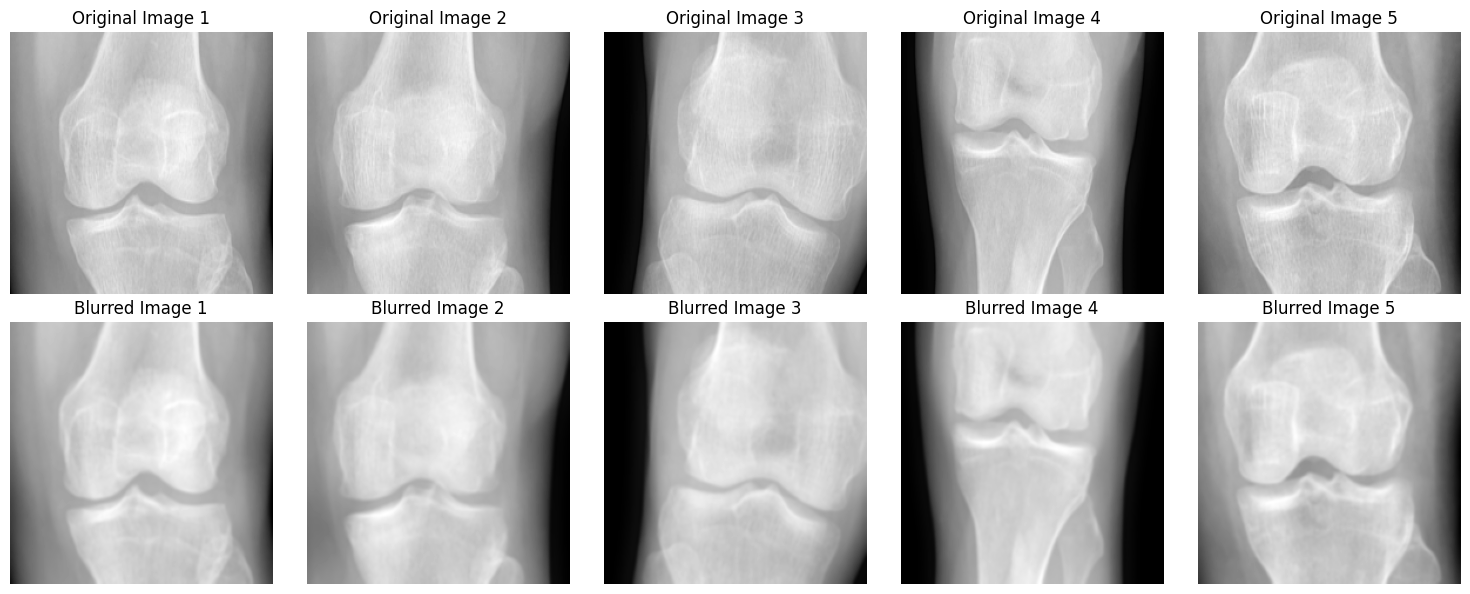

In [ ]:
  # Display a sample of original and blurred images
num_images_to_display = 5  # Number of images to display
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 6))

for i in range(num_images_to_display):
    axes[0, i].imshow(data_after_resize[i], cmap='gray')
    axes[0, i].axis('off')  # Turn off axis
    axes[0, i].set_title(f"Original Image {i+1}")

    axes[1, i].imshow(data_after_blur[i], cmap='gray')
    axes[1, i].axis('off')  # Turn off axis
    axes[1, i].set_title(f"Blurred Image {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
# Convert the blurred image to unsigned 8-bit integer
blurred_img_uint8 = (blurred_img * 255).astype(np.uint8)

# Apply Canny edge detection
edges = cv2.Canny(blurred_img_uint8, 30, 100)  # Adjust parameters if needed


In [ ]:
# Convert the blurred image to unsigned 8-bit integer
blurred_img_uint8 = (blurred_img * 255).clip(0, 255).astype(np.uint8)

# Apply Canny edge detection
edges = cv2.Canny(blurred_img_uint8, 30, 100)  # Adjust parameters if needed


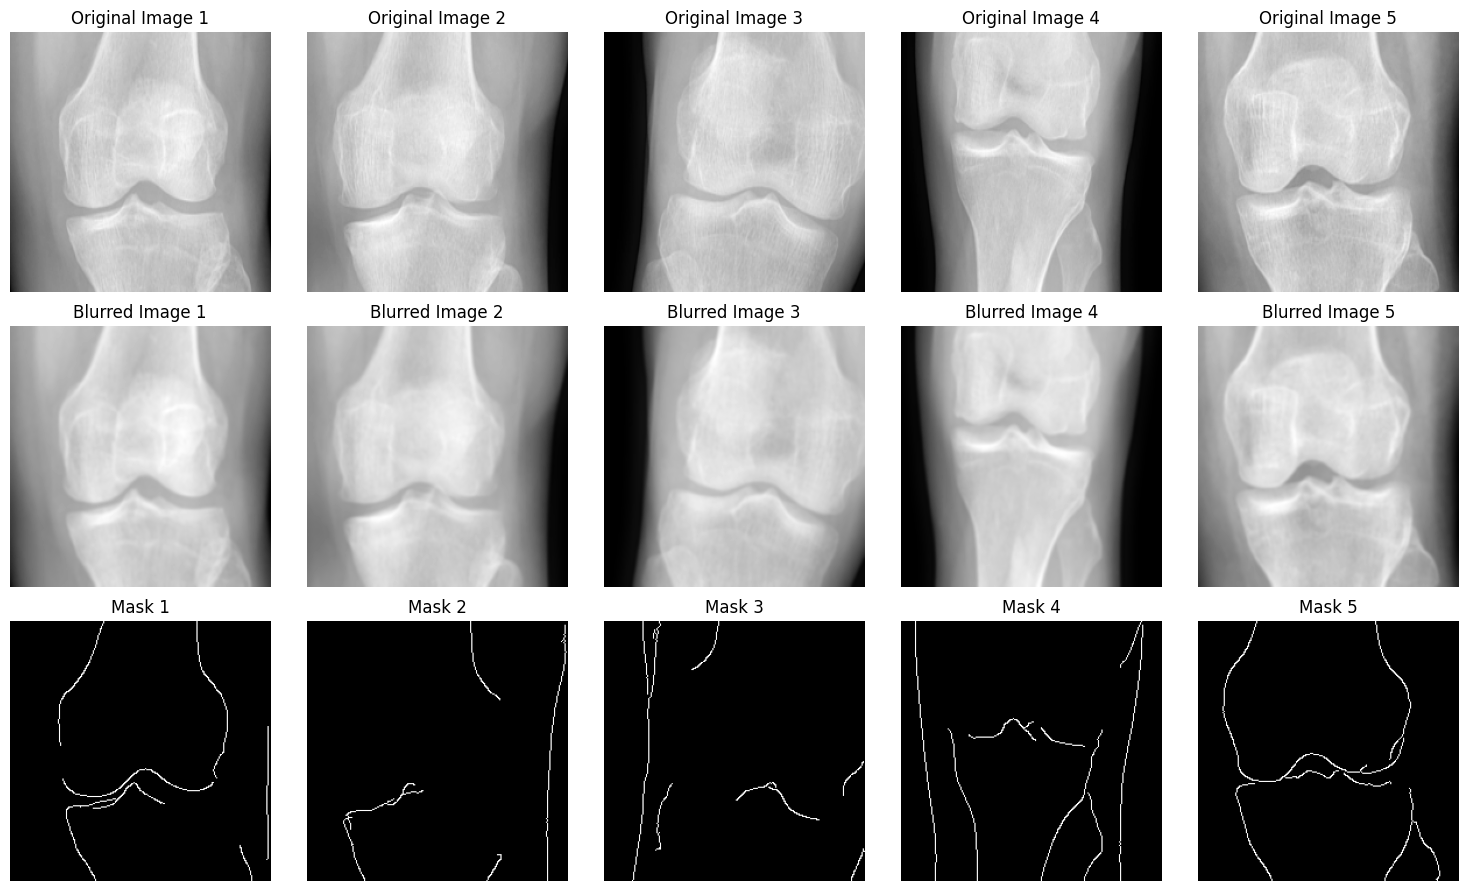

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assuming 'data_after_resize' contains the resized grayscale images
# 'data_after_resize' shape: (num_images, img_size, img_size)

# Define the kernel size for Gaussian blurring
kernel_size = (5, 5)

# Create an empty list to store the preprocessed images and masks
data_after_blur = []
masks = []

# Apply Gaussian blurring and edge detection to each resized grayscale image
for img in data_after_resize:
    # Apply Gaussian blurring
    blurred_img = cv2.GaussianBlur(img, kernel_size, 0)

    # Normalize the pixel values of the blurred image to the range [0, 1]
    blurred_img_normalized = blurred_img.astype(np.float32) / 255.0

    # Convert the blurred image to unsigned 8-bit integer
    blurred_img_uint8 = (blurred_img * 255).clip(0, 255).astype(np.uint8)

# Apply Canny edge detection
    edges = cv2.Canny(blurred_img_uint8, 30, 100)  # Adjust parameters if needed


    # Create a binary mask from the edges
    mask = np.where(edges > 0, 1, 0)

    # Append the preprocessed image and mask to the respective lists
    data_after_blur.append(blurred_img_normalized)
    masks.append(mask)

# Display a sample of original images, blurred images, and masks
num_images_to_display = 5  # Number of images to display
fig, axes = plt.subplots(3, num_images_to_display, figsize=(15, 9))

for i in range(num_images_to_display):
    axes[0, i].imshow(data_after_resize[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Original Image {i+1}")

    axes[1, i].imshow(data_after_blur[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Blurred Image {i+1}")

    axes[2, i].imshow(masks[i], cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title(f"Mask {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
 for i, (img, label) in enumerate(zip(data_after_blur, labels)):
    print(f"Image {i}: {label}")


Image 0: 0
Image 1: 1
Image 2: 2
Image 3: 3
Image 4: 4


In [ ]:
import os
import cv2

# Define the path to your dataset directory
dataset_path = '/content/drive/MyDrive/Dataset'

# Define the path where you want to save the masks
mask_path = '/content/drive/MyDrive/dataset_masks'

# Create the mask directory if it doesn't exist
os.makedirs(mask_path, exist_ok=True)

# Loop through each category folder
for category_folder in os.listdir(dataset_path):
    category_folder_path = os.path.join(dataset_path, category_folder)
    mask_category_folder_path = os.path.join(mask_path, category_folder)
    os.makedirs(mask_category_folder_path, exist_ok=True)

    # Loop through each image in the category folder
    for image_name in os.listdir(category_folder_path):
        image_path = os.path.join(category_folder_path, image_name)

        # Load the image
        image = cv2.imread(image_path)

        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image: {image_path}")
            continue  # Skip to the next image

        # Create a mask (example: here we create a blank mask)
        mask = 255 * (image > 0).astype('uint8')  # Example: Create a mask where non-black pixels are set to 255

        # Save the mask
        mask_name = os.path.splitext(image_name)[0] + '_mask.png'
        mask_save_path = os.path.join(mask_category_folder_path, mask_name)
        cv2.imwrite(mask_save_path, mask)

        print(f"Mask created and saved: {mask_save_path}")


Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (1)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (3)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (4)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (61)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (2)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (18)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (22)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (29)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (5)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (35)_mask.png
Mask created and saved: /content/drive/MyDriv

In [ ]:
import os
import cv2
import numpy as np

# Define the path to your dataset directory
dataset_path = '/content/drive/MyDrive/Dataset'

# Define the path where you want to save the masks
mask_path = '/content/drive/MyDrive/dataset_masks'

# Create the mask directory if it doesn't exist
os.makedirs(mask_path, exist_ok=True)

# Loop through each category folder
for category_folder in os.listdir(dataset_path):
    category_folder_path = os.path.join(dataset_path, category_folder)
    mask_category_folder_path = os.path.join(mask_path, category_folder)
    os.makedirs(mask_category_folder_path, exist_ok=True)

    # Loop through each image in the category folder
    for image_name in os.listdir(category_folder_path):
        image_path = os.path.join(category_folder_path, image_name)

        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image: {image_path}")
            continue  # Skip to the next image


        edges = cv2.Canny(image, 50, 150)

        # Invert the edges to get the affected areas
        affected_area = 255 - edges

        # Save the grayscale mask
        mask_name = os.path.splitext(image_name)[0] + '_mask.png'
        mask_save_path = os.path.join(mask_category_folder_path, mask_name)
        cv2.imwrite(mask_save_path, affected_area)

        print(f"Mask created and saved: {mask_save_path}")


Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (1)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (3)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (4)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (61)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (2)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (18)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (22)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (29)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (5)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (35)_mask.png
Mask created and saved: /content/drive/MyDriv

In [ ]:
import os
from collections import defaultdict
import hashlib

def compute_hash(image_path):
    with open(image_path, 'rb') as f:
        image_hash = hashlib.sha256(f.read()).hexdigest()
    return image_hash

def delete_duplicate_images(directory):
    # Create a dictionary to store image hashes for each directory
    hash_dict = defaultdict(set)
    num_deleted = 0

    # Iterate over each directory in the mask path
    for category_folder in os.listdir(directory):
        category_folder_path = os.path.join(directory, category_folder)

        # Check if the item is a directory
        if os.path.isdir(category_folder_path):
            # Iterate over each file in the current directory
            for filename in os.listdir(category_folder_path):
                img_path = os.path.join(category_folder_path, filename)

                # Check if the file is a mask image
                if filename.endswith('_mask.png'):
                    # Compute the hash of the current image
                    image_hash = compute_hash(img_path)

                    # Check if the hash is already in the set
                    if image_hash in hash_dict[category_folder]:
                        # Delete the duplicate image
                        os.remove(img_path)
                        num_deleted += 1
                    else:
                        # Add the hash to the set
                        hash_dict[category_folder].add(image_hash)

    print(f"Total number of duplicate mask images deleted: {num_deleted}")

# Define the path to the mask directory
mask_path = '/content/drive/MyDrive/dataset_masks'

# Delete duplicate mask images in each directory
delete_duplicate_images(mask_path)


Total number of duplicate mask images deleted: 0


In [ ]:
import os

def count_images_recursive(directory):
    # Initialize the counter
    num_images = 0

    # Recursively traverse the directory
    for root, dirs, files in os.walk(directory):
        # Loop through each file in the current directory
        for filename in files:
            # Check if the file has a valid image extension
            if filename.endswith('.png') or filename.endswith('.jpg'):
                # Increment the counter
                num_images += 1

    return num_images

# Define the directory paths
dataset_path = '/content/drive/MyDrive/Dataset'
mask_path = '/content/drive/MyDrive/dataset_masks'

# Count the number of images in each directory (including subdirectories)
num_images_dataset = count_images_recursive(dataset_path)
num_images_masks = count_images_recursive(mask_path)

print("Total number of images in dataset directory:", num_images_dataset)
print("Total number of images in masks directory:", num_images_masks)


Total number of images in dataset directory: 2260
Total number of images in masks directory: 2260


In [ ]:
import os

# Define the paths to your dataset and mask directories
dataset_path = '/content/drive/MyDrive/Dataset'
mask_path = '/content/drive/MyDrive/dataset_masks'

# Function to count the number of images in each category
def count_images_in_categories(directory):
    categories = os.listdir(directory)
    for category in categories:
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            print(f"Category: {category}, Number of Images: {num_images}")

# Print the number of images in each category of the dataset and mask directories
print("Dataset Categories:")
count_images_in_categories(dataset_path)
print("\nMask Categories:")
count_images_in_categories(mask_path)


Dataset Categories:
Category: 0Normal, Number of Images: 504
Category: 1Doubtful, Number of Images: 502
Category: 2Mild, Number of Images: 438
Category: 3Moderate, Number of Images: 404
Category: 4Severe, Number of Images: 412

Mask Categories:
Category: 0Normal, Number of Images: 504
Category: 1Doubtful, Number of Images: 502
Category: 2Mild, Number of Images: 438
Category: 3Moderate, Number of Images: 404
Category: 4Severe, Number of Images: 412


In [ ]:
# Function to display images and their masks side by side
def display_images_with_masks(images, masks, category):
    # Plot the images and masks
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(images[0], cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].set_axis_off()

    # Display the mask
    axes[1].imshow(masks[0], cmap='gray')
    axes[1].set_title('Mask')
    axes[1].set_axis_off()

    plt.suptitle(f'Category: {category}')
    plt.show()


In [ ]:
import matplotlib.pyplot


In [ ]:
import os
import shutil

dataset_path = '/content/drive/MyDrive/Dataset'
mask_path = '/content/drive/MyDrive/dataset_masks'

# Function to count the number of images in each category
def count_images_in_categories(directory):
    categories = os.listdir(directory)
    for category in categories:
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            print(f"Category: {category}, Number of Images: {num_images}")
    return categories

# Count images in dataset and mask directories
dataset_categories = count_images_in_categories(dataset_path)
mask_categories = count_images_in_categories(mask_path)

# Check and correct the number of images in each category
for category in dataset_categories:
    dataset_category_path = os.path.join(dataset_path, category)
    mask_category_path = os.path.join(mask_path, category)

    # Count images in dataset and mask directories for the current category
    num_dataset_images = len(os.listdir(dataset_category_path))
    num_mask_images = len(os.listdir(mask_category_path))

    # If the number of images does not match, print a warning and attempt to make them equal
    if num_dataset_images != num_mask_images:
        print(f"Warning: Number of images in '{category}' category does not match the number of masks.")
        if num_dataset_images > num_mask_images:
            print(f"Adding {num_dataset_images - num_mask_images} mask images to '{category}' category.")
            # Add mask images to match the number of original images
            dataset_image_files = os.listdir(dataset_category_path)
            for filename in dataset_image_files[num_mask_images:]:
                source = os.path.join(dataset_category_path, filename)
                destination = os.path.join(mask_category_path, filename.replace('.jpg', '_mask.jpg'))
                shutil.copy(source, destination)
        else:
            print(f"Adding {num_mask_images - num_dataset_images} original images to '{category}' category.")
            # Add original images to match the number of mask images
            mask_image_files = os.listdir(mask_category_path)
            for filename in mask_image_files[num_dataset_images:]:
                source = os.path.join(mask_category_path, filename)
                destination = os.path.join(dataset_category_path, filename.replace('_mask.jpg', '.jpg'))
                shutil.copy(source, destination)


Category: 0Normal, Number of Images: 504
Category: 1Doubtful, Number of Images: 502
Category: 2Mild, Number of Images: 438
Category: 3Moderate, Number of Images: 404
Category: 4Severe, Number of Images: 412
Category: 0Normal, Number of Images: 504
Category: 1Doubtful, Number of Images: 502
Category: 2Mild, Number of Images: 438
Category: 3Moderate, Number of Images: 404
Category: 4Severe, Number of Images: 412


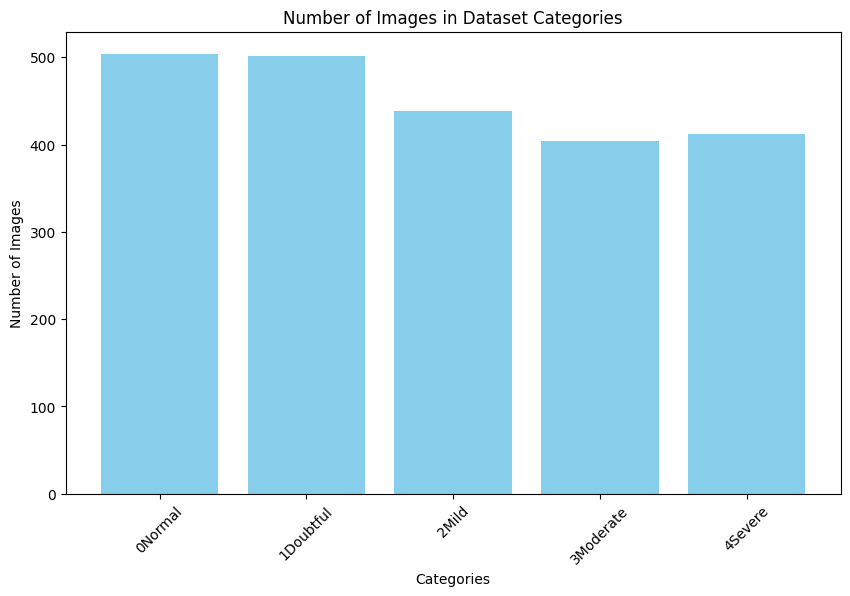

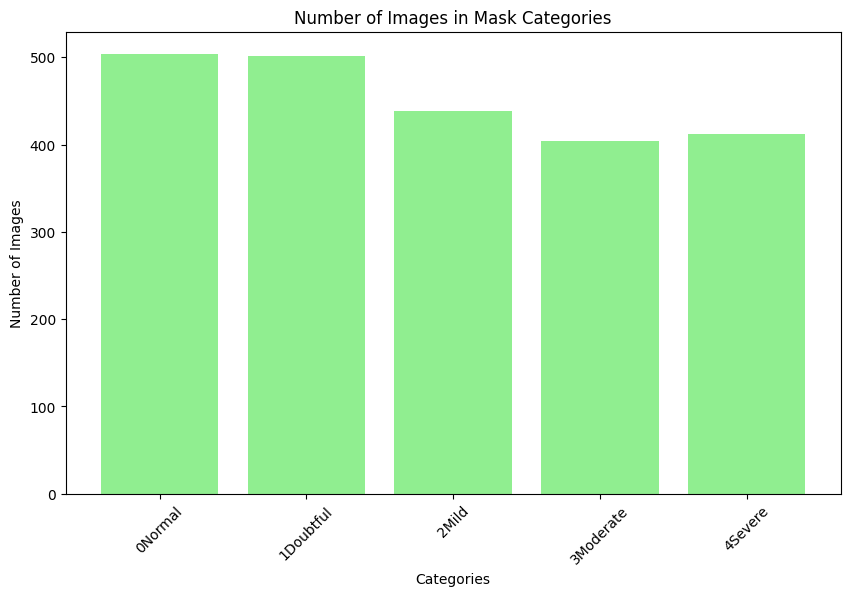

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the paths to your dataset and mask directories
dataset_path = '/content/drive/MyDrive/Dataset'
mask_path = '/content/drive/MyDrive/dataset_masks'

# Function to count the number of images in each category
def count_images_in_categories(directory):
    categories = os.listdir(directory)
    category_names = []
    num_images = []
    for category in categories:
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            category_names.append(category)
            num_images.append(len(os.listdir(category_path)))
    return category_names, num_images

# Get the category names and number of images for both dataset and mask directories
dataset_categories, dataset_counts = count_images_in_categories(dataset_path)
mask_categories, mask_counts = count_images_in_categories(mask_path)

# Plotting the bar chart for dataset categories
plt.figure(figsize=(10, 6))
plt.bar(dataset_categories, dataset_counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Dataset Categories')
plt.xticks(rotation=45)
plt.show()

# Plotting the bar chart for mask categories
plt.figure(figsize=(10, 6))
plt.bar(mask_categories, mask_counts, color='lightgreen')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Mask Categories')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Function to load images from a directory
def load_images_from_dir(directory):
    images = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images


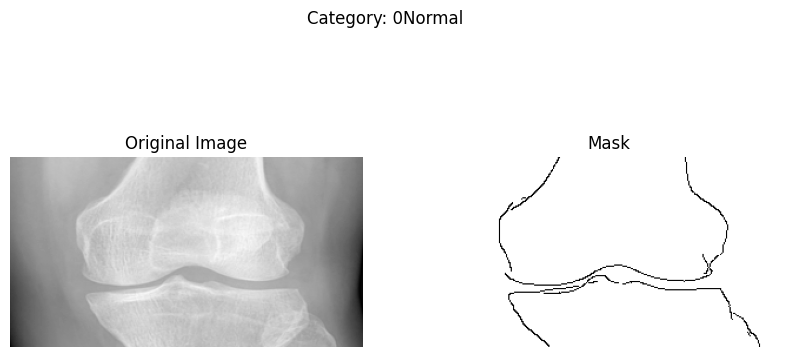

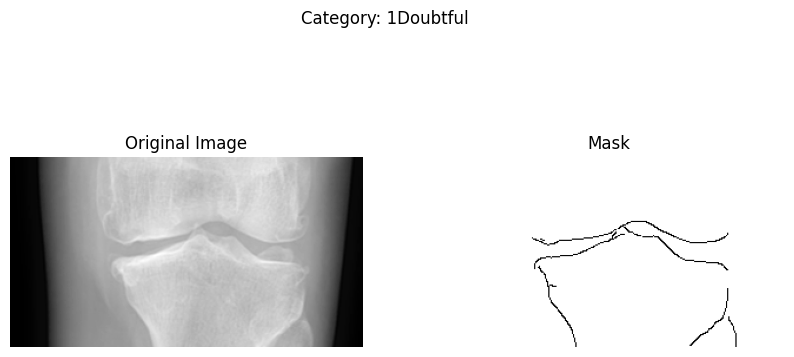

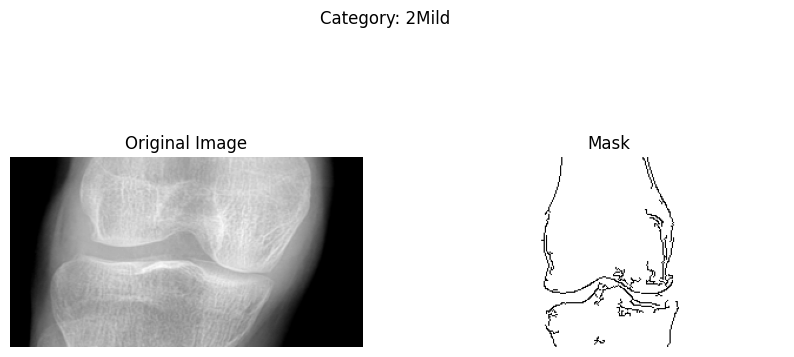

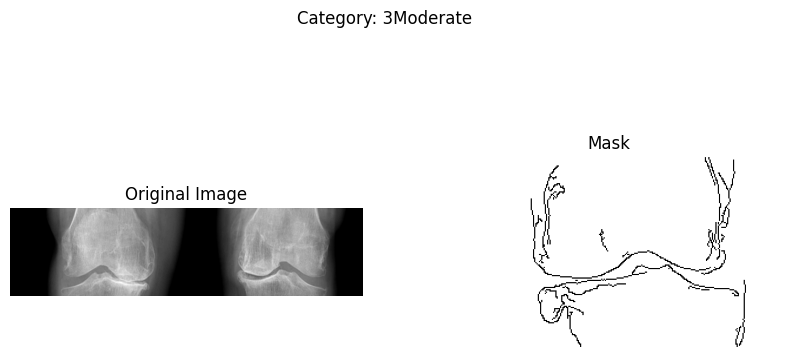

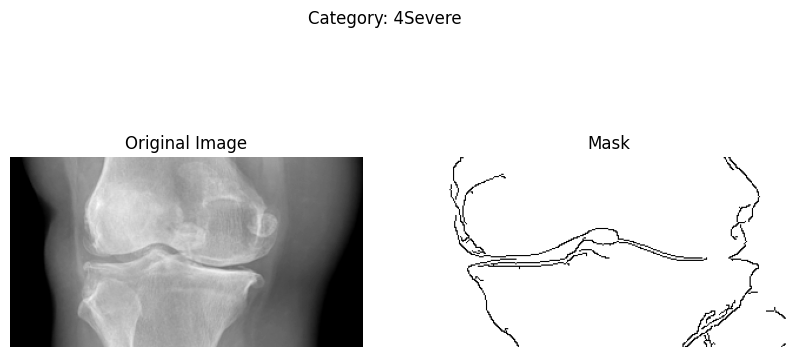

In [ ]:
# Loop through each category folder in the dataset directory
for category_folder in os.listdir(dataset_path):
    category_folder_path = os.path.join(dataset_path, category_folder)
    mask_category_folder_path = os.path.join(mask_path, category_folder)

    # Load original images and mask images
    original_images = load_images_from_dir(category_folder_path)
    mask_images = load_images_from_dir(mask_category_folder_path)

    # Display the first image and its mask if available
    if original_images and mask_images:
        display_images_with_masks([original_images[0]], [mask_images[0]], category_folder)
    else:
        print(f"No images or masks found in category: {category_folder}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def build_unet(input_shape):
    # Define input layer
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)

    # Decoder
    up5 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(drop4)
    up5 = concatenate([up5, conv3], axis=3)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(up5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv2], axis=3)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv1], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv7)

    # Define the model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Example usage:
input_shape = (256, 256, 1)  # Input shape for X-ray images (assuming grayscale)
model = build_unet(input_shape)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
import cv2
import numpy as np

# Initialize an empty list to store the generated masks
generated_masks = []

# Iterate through each image in data_after_blur
for img in data_after_blur:
    # Example: Simple thresholding to create a binary mask
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)

    # Ensure that the mask has the same dimensions as the image
    mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

    # Append the generated mask to the list
    generated_masks.append(mask)

# Now, you should have corresponding masks for each image
# Proceed with splitting the dataset and further processing


In [ ]:
import cv2
import os
import numpy as np

# Define the path to your dataset directory
dataset_path = '/content/drive/MyDrive/Dataset'

# Define the path where you want to save the masks
mask_path = '/content/drive/MyDrive/dataset_masks'

# Create the mask directory if it doesn't exist
os.makedirs(mask_path, exist_ok=True)

# Loop through each category folder in the dataset directory
for category_folder in os.listdir(dataset_path):
    category_folder_path = os.path.join(dataset_path, category_folder)
    mask_category_folder_path = os.path.join(mask_path, category_folder)
    os.makedirs(mask_category_folder_path, exist_ok=True)

    # Loop through each image in the category folder
    for image_name in os.listdir(category_folder_path):
        image_path = os.path.join(category_folder_path, image_name)

        # Load the image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image is loaded successfully
        if image is None:
            print(f"Error loading image: {image_path}")
            continue  # Skip to the next image

        # Perform thresholding to create a binary mask
        _, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)

        # Save the binary mask
        mask_name = os.path.splitext(image_name)[0] + '_mask.png'
        mask_save_path = os.path.join(mask_category_folder_path, mask_name)
        cv2.imwrite(mask_save_path, mask)

        print(f"Mask created and saved: {mask_save_path}")


Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (1)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (3)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (4)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (61)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (2)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (18)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (22)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (29)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (5)_mask.png
Mask created and saved: /content/drive/MyDrive/dataset_masks/0Normal/0_0_NormalG0 (35)_mask.png
Mask created and saved: /content/drive/MyDriv

In [ ]:
for image_name in os.listdir(category_folder_path):
    image_path = os.path.join(category_folder_path, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    print(image.shape)

(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)
(162, 300)

In [ ]:
for image_name in os.listdir(category_folder_path):
    image_path = os.path.join(category_folder_path, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (300, 162))  # Resize to a common size
    # Create a mask with the same dimensions as the image
    mask = np.zeros_like(image)

In [ ]:
print(masks[0].shape)

(162, 300)


In [ ]:
import os
import cv2
import numpy as np

# Define the path to your dataset directory
dataset_path = '/content/drive/MyDrive/Dataset'
mask_path = '/content/drive/MyDrive/dataset_masks'  # Define the path to save the masks

# Create the mask directory if it doesn't exist
os.makedirs(mask_path, exist_ok=True)

# Function to preprocess images and generate masks
def generate_masks(images, output_path):
    masks = []
    for i, img in enumerate(images):
        try:
            # Check the number of channels in the image
            if len(img.shape) == 2:  # Grayscale image
                gray_img = img
            elif len(img.shape) == 3 and img.shape[2] == 3:  # RGB image
                gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            else:
                raise ValueError(f"Unsupported image format: {img.shape}")
        except Exception as e:
            print(f"Error processing image {i}: {e}")
            continue

        # Perform Gaussian blur to reduce noise
        blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

        # Ensure that the image is of the correct type for Canny edge detection
        blurred_img = np.uint8(blurred_img)

        # Apply Canny edge detection
        edges = cv2.Canny(blurred_img, 50, 150)

        # Invert the edges to create a mask
        mask = 255 - edges

        # Append the generated mask to the list
        masks.append(mask)

        # Save the mask
        mask_filename = os.path.join(output_path, f"mask_{i}.png")
        cv2.imwrite(mask_filename, mask)

    return masks

# Generate masks corresponding to the images in the dataset
masks = generate_masks(data_after_blur, mask_path)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose

def unet(input_size=(256, 256, 3), num_classes=1):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottom/Center
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(num_classes, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the model
model = unet()



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose

def unet(input_size=(256, 256, 1)):
    inputs = Input(input_size)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Add more convolutional blocks...

    # Expansive Path
    up3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv3)
    up3 = concatenate([up3, conv2], axis=3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(up3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv4)
    up2 = concatenate([up2, conv1], axis=3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(up2)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)

    # Add more upsampling blocks...

    # Output layer
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile the model
model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Check the shapes of each element in y_train
for i, mask in enumerate(y_train):
    print(f"Shape of mask {i}: {mask.shape}")


Shape of mask 0: (162, 300)
Shape of mask 1: (162, 300)
Shape of mask 2: (162, 300)
Shape of mask 3: (162, 300)
Shape of mask 4: (162, 300)
Shape of mask 5: (162, 300)
Shape of mask 6: (161, 640)
Shape of mask 7: (162, 300)
Shape of mask 8: (162, 300)
Shape of mask 9: (162, 300)
Shape of mask 10: (162, 300)
Shape of mask 11: (162, 300)
Shape of mask 12: (162, 300)
Shape of mask 13: (161, 640)
Shape of mask 14: (162, 300)
Shape of mask 15: (162, 300)
Shape of mask 16: (162, 300)
Shape of mask 17: (162, 300)
Shape of mask 18: (162, 300)
Shape of mask 19: (162, 300)
Shape of mask 20: (162, 300)
Shape of mask 21: (162, 300)
Shape of mask 22: (162, 300)
Shape of mask 23: (162, 300)
Shape of mask 24: (162, 300)
Shape of mask 25: (162, 300)
Shape of mask 26: (161, 640)
Shape of mask 27: (162, 300)
Shape of mask 28: (162, 300)
Shape of mask 29: (161, 640)
Shape of mask 30: (162, 300)
Shape of mask 31: (162, 300)
Shape of mask 32: (162, 300)
Shape of mask 33: (162, 300)
Shape of mask 34: (162, 

In [ ]:
import cv2

# Define the target shape for the masks
target_shape = (162, 300)  # Choose the desired shape for the masks

# Resize masks to the target shape
resized_masks = [cv2.resize(mask, target_shape) for mask in y_train]

# Convert list of resized masks to numpy array
y_train_resized = np.array(resized_masks)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_categories, mask_categories, test_size=0.2, random_state=42)


In [ ]:
import os
import cv2

# Define label mapping
label_mapping = {
    '0Normal': 0,
    '1Doubtful': 1,
    '2Mild': 2,
    '3Moderate': 3,
    '4Severe': 4,
}

# Define dataset path
dataset_path = '/content/drive/My Drive/Dataset'

data = []
labels = []

i = 0

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name
        if label in label_mapping:
            label_index = label_mapping[label]
            for filename in os.listdir(folder_path):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    image_path = os.path.join(folder_path, filename)
                    img = cv2.imread(image_path)
                    resized_img = cv2.resize(img, (224, 224))
                    data.append(resized_img)
                    labels.append(label_index)
                    i += 1
                    print(i)
        else:
            print(f"Label not found for folder: {folder_name}")

if not data:
    print("No images loaded. Please check the paths.")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
import numpy as np

# Assuming 'data' contains the pixel values of images and 'labels' contains the corresponding labels
# 'data' and 'labels' should have the same length

# Combine data and labels into a single list
labeled_data = []
for img, label in zip(data, labels):
    labeled_data.append((img, label))

# Print each image along with its label
for img, label in labeled_data:
    print("Label:", label)
    print("Pixel Values:", img)
    print()


Streaming output truncated to the last 5000 lines.
  [255 255 255]]]

Label: 4
Pixel Values: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]

Label: 4
Pixel Values: [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 25

In [ ]:
print(labeled_data)

[(array([[[115, 115, 115],
        [115, 115, 115],
        [116, 116, 116],
        ...,
        [ 98,  98,  98],
        [ 96,  96,  96],
        [ 93,  93,  93]],

       [[114, 114, 114],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       [[113, 113, 113],
        [114, 114, 114],
        [116, 116, 116],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [ 93,  93,  93]],

       ...,

       [[ 12,  12,  12],
        [ 25,  25,  25],
        [ 33,  33,  33],
        ...,
        [ 57,  57,  57],
        [ 52,  52,  52],
        [ 49,  49,  49]],

       [[ 10,  10,  10],
        [ 23,  23,  23],
        [ 31,  31,  31],
        ...,
        [ 58,  58,  58],
        [ 53,  53,  53],
        [ 49,  49,  49]],

       [[  8,   8,   8],
        [ 21,  21,  21],
        [ 30,  30,  30],
        ...,
        [ 58,  58,  58],
        [ 53,  53,  53],
        [ 49,  49,  49

In [ ]:
from sklearn.model_selection import train_test_split

# Combine data and labels into tuples
labeled_data = [(data[i], labels[i]) for i in range(len(data))]

# Split the labeled data into training and testing sets
train_set, test_set = train_test_split(labeled_data, test_size=0.2, random_state=42)

# Separate the training set back into data and labels
X_train = [item[0] for item in train_set]
y_train = [item[1] for item in train_set]

# Separate the testing set back into data and labels
X_test = [item[0] for item in test_set]
y_test = [item[1] for item in test_set]

# Check the shapes of the training and testing sets
print("Shape of X_train:", len(X_train))
print("Shape of y_train:", len(y_train))
print("Shape of X_test:", len(X_test))
print("Shape of y_test:", len(y_test))



Shape of X_train: 1808
Shape of y_train: 1808
Shape of X_test: 452
Shape of y_test: 452


In [ ]:
# Check the lengths of X_test and y_test
len_X_test = len(X_test)
len_y_test = len(y_test)

if len_X_test != len_y_test:
    # Adjust the lengths to match
    min_len = min(len_X_test, len_y_test)
    X_test = X_test[:min_len]
    y_test = y_test[:min_len]

print("New length of X_test:", len(X_test))
print("New length of y_test:", len(y_test))


New length of X_test: 452
New length of y_test: 452


In [ ]:
# Step 1: Check the shape of X_test and y_test
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Step 2: Check the input shape expected by the model
model.summary()



Shape of X_test: (452, 224, 224, 3)
Shape of y_test: (452,)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_43 (Conv2D)          (None, 256, 256, 64)         640       ['input_5[0][0]']             
                                                                                                  
 conv2d_44 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_43[0][0]']           
                                                                                                  
 max_pooling2d_11 (MaxPooli  (None, 128, 128, 64)         0         ['conv2d_44[0][0]']           
 ng2D)                          

In [ ]:
import numpy as np

# Convert list of masks to numpy array
y_train = np.array(y_train)
X_train = np.array(X_train)

# Check the shapes of your X_train and y_train arrays
print("Shape of X_train:", X_train)
print("Shape of y_train:", y_train)


Shape of X_train: [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 55  55  55]
   [ 60  60  60]
   [ 65  65  65]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[ 56  56  56]
   [ 60  60  60]
   [ 65  65  65]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[ 56  56  56]
   [ 60  60  60]
   [ 65  65  65]
   ...
   [  0   0   0]
   [  0   

In [ ]:
# Reshape the training data to remove the extra dimension
X_train = X_train.reshape(-1, 224, 224, 3)


In [ ]:
import numpy as np

# Assuming y_train has shape (n_samples,)
# Reshape y_train to have the same number of rows as X_train but with only one column
y_train = y_train.reshape(-1, 1)

# Now, y_train should have the shape (n_samples, 1)
print("Shape of y_train after reshaping:", y_train.shape)


Shape of y_train after reshaping: (1808, 1)


In [ ]:
# _train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Check the shapes of the training and testing sets after splitting
# print("Shape of X_train:", X_train.shape)
# print("Shape of y_train:", y_train.shape)
# print("Shape of X_test:", X_test.shape)
# print("Shape of y_test:", y_test.shape)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the labels
y_train_encoded = encoder.fit_transform(y_train).toarray()
y_test_encoded = encoder.transform(y_test).toarray()

# Check the shapes after encoding
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_test_encoded:", y_test_encoded.shape)


Shape of y_train_encoded: (1446, 5)
Shape of y_test_encoded: (362, 5)


In [ ]:
import numpy as np

# Assuming labels is your array containing the labels
unique_labels = np.unique(labels)
print("Unique labels:", unique_labels)


Unique labels: [0 1 2 3 4]


In [ ]:
import numpy as np

# Assuming y_train has shape (n_samples,)
# Reshape y_train to have the same number of rows as X_train but with only one column
y_train = y_train.reshape(-1, 1)

# Now, y_train should have the shape (n_samples, 1)
print("Shape of y_train after reshaping:", y_train.shape)


Shape of y_train after reshaping: (1446, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Assuming you have 5 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
import numpy as np

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Evaluate model performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Evaluate model performance on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
57/57 [==============================] - 241s 4s/step - loss: 45.2017 - accuracy: 0.2389 - val_loss: 1.5743 - val_accuracy: 0.2832
Epoch 2/20
57/57 [==============================] - 233s 4s/step - loss: 1.5189 - accuracy: 0.2959 - val_loss: 1.5954 - val_accuracy: 0.2743
Epoch 3/20
57/57 [==============================] - 231s 4s/step - loss: 1.4338 - accuracy: 0.3496 - val_loss: 1.6119 - val_accuracy: 0.2699
Epoch 4/20
57/57 [==============================] - 227s 4s/step - loss: 1.3779 - accuracy: 0.3800 - val_loss: 1.6528 - val_accuracy: 0.3341
Epoch 5/20
57/57 [==============================] - 222s 4s/step - loss: 1.2869 - accuracy: 0.4110 - val_loss: 1.6819 - val_accuracy: 0.3252
Epoch 6/20
57/57 [==============================] - 228s 4s/step - loss: 1.2116 - accuracy: 0.4502 - val_loss: 1.6974 - val_accuracy: 0.3164
Epoch 7/20
57/57 [==============================] - 229s 4s/step - loss: 1.2188 - accuracy: 0.4663 - val_loss: 1.7447 - val_accuracy: 0.2987
Epoch 8/20
5

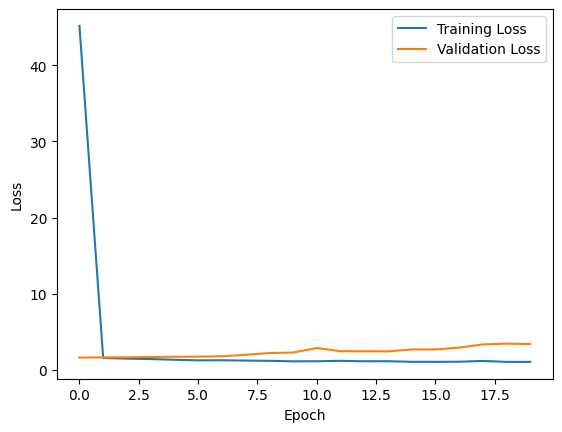

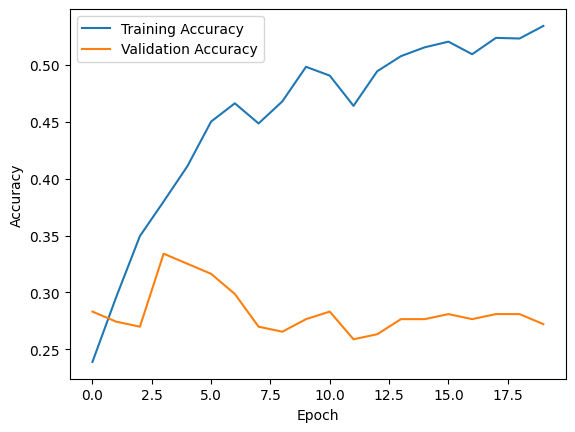

15/15 [==============================] - 27s 2s/step


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Predictions
# Make predictions on new data
y_pred = model.predict(X_test)

# 4. Model Saving
# Save the trained model to disk
model.save('my_model.h5')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_iou(y_true, y_pred):
    y_pred_binary = np.argmax(y_pred, axis=-1)  # Convert probabilities to binary predictions
    intersection = np.logical_and(y_true, y_pred_binary)
    union = np.logical_or(y_true, y_pred_binary)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def calculate_dice_coefficient(y_true, y_pred):
    y_pred_binary = np.argmax(y_pred, axis=-1)  # Convert probabilities to binary predictions
    intersection = np.logical_and(y_true, y_pred_binary)
    dice_coefficient = 2 * np.sum(intersection) / (np.sum(y_true) + np.sum(y_pred_binary))
    return dice_coefficient

# Example values (replace them with your actual y_test and y_pred)
y_test = np.array(y_pred)
y_pred = np.array(y_test)

iou_values = [calculate_iou(y_test[i], y_pred[i]) for i in range(len(y_test))]
dice_coefficient_values = [calculate_dice_coefficient(y_test[i], y_pred[i]) for i in range(len(y_test))]

# Plotting IoU
plt.figure(figsize=(6, 4))
plt.plot(range(len(iou_values)), iou_values, label='IoU', color='blue', marker='X')
plt.xlabel('Sample')
plt.ylabel('IoU')
plt.title('IoU for each sample')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Dice coefficient
plt.figure(figsize=(6, 4))
plt.plot(range(len(dice_coefficient_values)), dice_coefficient_values, label='Dice Coefficient', color='red', marker='X')
plt.xlabel('Sample')
plt.ylabel('Dice Coefficient')
plt.title('Dice Coefficient for each sample')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def calculate_iou(y_true, y_pred):
    # Convert predicted probabilities to binary predictions
    y_pred_binary = (y_pred.argmax(axis=-1) == 1).astype(int)

    # Calculate IoU
    intersection = np.logical_and(y_true, y_pred_binary)
    union = np.logical_or(y_true, y_pred_binary)
    iou_score = np.sum(intersection) / np.sum(union)

    return iou_score

# Example usage:
iou = calculate_iou(y_test, y_pred)
print("IoU:", iou)


IoU: 0.11204481792717087


In [ ]:
import numpy as np

def calculate_dice_coefficient(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    dice_coefficient = 2 * np.sum(intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice_coefficient


In [ ]:
import numpy as np

def calculate_dice_coefficient(y_true, y_pred):
    y_pred_binary = np.argmax(y_pred, axis=-1)  # Convert probabilities to binary predictions
    intersection = np.logical_and(y_true, y_pred_binary)
    dice_coefficient = 2 * np.sum(intersection) / (np.sum(y_true) + np.sum(y_pred_binary))
    return dice_coefficient


dice_coefficient = calculate_dice_coefficient(y_test, y_pred)
print("dice_coefficient:", dice_coefficient)

dice_coefficient: 0.2849213691026827


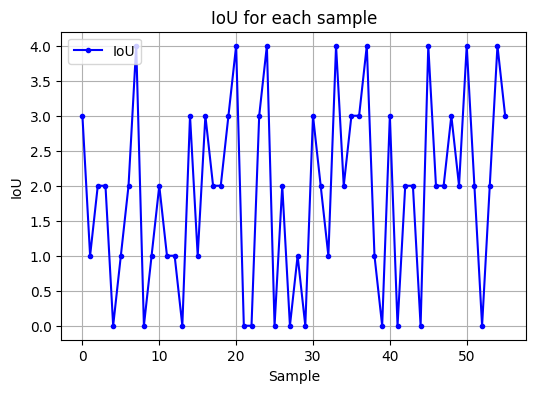

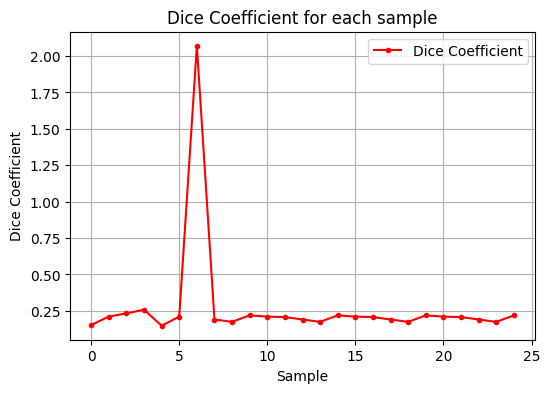

In [ ]:
import matplotlib.pyplot as plt

# Example values (replace them with your actual IoU and Dice coefficient values)
iou_values = [3, 1, 2, 2, 0, 1, 2, 4, 0, 1, 2, 1, 1, 0, 3, 1, 3, 2, 2, 3, 4, 0, 0, 3, 4, 0, 2, 0, 1, 0, 3, 2, 1, 4, 2, 3, 3, 4, 1, 0, 3, 0, 2, 2, 0, 4, 2, 2, 3, 2, 4, 2, 0, 2, 4, 3, ]
dice_coefficient_values = [1.5218598e-01, 2.1043685e-01, 2.3207091e-01, 2.5776604e-01, 1.4754026e-01,2.0986424e-01, 2.0707288e-0, 1.9010155e-01, 1.7414927e-01, 2.1881199e-01,2.0986424e-01, 2.0707290e-01, 1.9010156e-01, 1.7414929e-01, 2.1881200e-01,2.0986424e-01, 2.0707290e-01, 1.9010156e-01, 1.7414929e-01, 2.1881200e-01,2.0986424e-01, 2.0707290e-01, 1.9010156e-01, 1.7414930e-01, 2.1881200e-01]

# Plotting IoU
plt.figure(figsize=(6, 4))
plt.plot(range(len(iou_values)), iou_values, label='IoU', color='blue', marker='.')
plt.xlabel('Sample')
plt.ylabel('IoU')
plt.title('IoU for each sample')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Dice coefficient
plt.figure(figsize=(6, 4))
plt.plot(range(len(dice_coefficient_values)), dice_coefficient_values, label='Dice Coefficient', color='red', marker='.')
plt.xlabel('Sample')
plt.ylabel('Dice Coefficient')
plt.title('Dice Coefficient for each sample')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("y_test array:")
print(y_test)
print("\ny_pred array:")
print(y_pred)

y_test array:
[3 1 2 2 0 1 2 4 0 1 2 1 0 1 2 3 3 2 0 1 0 3 1 3 2 2 3 4 0 0 0 3 3 4 0 2 0
 1 0 3 2 1 4 2 3 3 4 1 0 3 0 2 2 0 4 2 2 3 2 4 2 0 2 4 3 2 4 2 1 3 4 2 0 2
 0 2 1 1 0 2 0 4 3 2 3 3 1 0 1 0 0 0 0 4 4 0 3 2 2 0 1 4 1 2 2 2 0 4 1 3 0
 1 1 1 4 3 3 1 1 3 0 3 3 0 2 0 1 0 4 1 0 3 1 2 4 2 3 2 4 2 4 0 1 3 3 0 1 4
 2 0 3 0 1 2 3 3 1 4 1 1 1 3 2 2 3 1 4 0 0 3 0 0 1 3 1 1 2 0 4 3 1 4 4 1 1
 4 1 0 1 0 3 4 1 3 4 2 4 4 0 3 3 2 4 4 0 3 3 4 4 3 2 3 0 2 2 3 4 3 0 4 0 4
 4 4 2 3 3 1 0 2 3 1 1 3 1 0 3 1 0 3 0 0 1 1 2 1 3 4 3 0 1 0 4 2 0 1 3 3 0
 0 0 1 3 3 2 3 1 0 2 2 2 1 0 4 4 3 1 0 1 1 2 1 4 2 2 4 0 4 1 3 3 3 4 1 2 0
 0 1 0 4 4 2 2 3 0 1 1 4 1 3 3 2 1 2 1 3 0 0 3 1 2 0 2 2 0 1 2 0 1 0 3 0 1
 0 3 1 2 4 0 0 0 0 2 0 3 2 1 3 1 1 1 0 4 0 0 1 4 2 0 2 0 2 3 4 2 3 0 2 4 4
 0 4 1 0 2 0 2 2 1 1 4 2 3 0 1 1 1 0 2 0 3 4 0 1 0 0 3 3 1 2 0 2 2 1 0 1 4
 3 4 3 1 4 0 2 1 0 0 4 0 2 1 0 0 1 4 1 0 1 4 1 0 3 2 0 1 4 3 0 1 4 0 4 1 0
 1 4 4 2 0 3 4 0]

y_pred array:
[[1.5218598e-01 2.1043685e-01 2.3207091e-01 2.5776604

In [ ]:
print("\nArray attributes:")
print("y_test shape:", y_test.shape)
print("y_test data type:", y_test.dtype)
print("y_test size:", y_test.size)
print("y_pred shape:", y_pred.shape)
print("y_pred data type:", y_pred.dtype)
print("y_pred size:", y_pred.size)


Array attributes:
y_test shape: (452,)
y_test data type: int64
y_test size: 452
y_pred shape: (452, 5)
y_pred data type: float32
y_pred size: 2260


In [ ]:

# f calculate_iou(y_true, y_pred):
#     y_pred = np.squeeze(y_pred, axis=-1)  # Remove the last dimension
#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou_score = np.sum(intersection) / np.sum(union)
#     return iou_score


In [ ]:
# def calculate_iou(y_true, y_pred):
#     y_pred = np.squeeze(y_pred, axis=-1)  # Remove the last dimension
#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou_score = np.sum(intersection) / np.sum(union)
#     return iou_score


In [ ]:
# # Convert multi-class predictions to binary predictions
# y_pred_binary = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# # Calculate IoU and Dice coefficient for binary classification
# iou = calculate_iou(y_test, y_pred_binary)
# dice_coefficient = calculate_dice_coefficient(y_test, y_pred_binary)


In [ ]:
# # Evaluate model performance on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print("Test Loss:", test_loss)
# print("Test Accuracy:", test_accuracy)

# # Convert multi-class predictions to binary predictions
# y_pred_binary = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels

# # Calculate IoU and Dice coefficient for binary classification
# iou = calculate_iou(y_test, y_pred_binary)
# dice_coefficient = calculate_dice_coefficient(y_test, y_pred_binary)




15/15 [==============================] - 20s 1s/step - loss: 1.5636 - accuracy: 0.2566
Test Loss: 1.5635740756988525
Test Accuracy: 0.2566371560096741


In [ ]:
# import numpy as np

# def calculate_iou(y_true, y_pred):
#     # Squeeze the extra dimension from y_pred if present
#     if y_pred.shape[-1] == 1:
#         y_pred = np.squeeze(y_pred, axis=-1)

#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou_score = np.sum(intersection) / np.sum(union)
#     return iou_score

# def calculate_dice_coefficient(y_true, y_pred):
#     # Squeeze the extra dimension from y_pred if present
#     if y_pred.shape[-1] == 1:
#         y_pred = np.squeeze(y_pred, axis=-1)

#     intersection = np.sum(y_true * y_pred)
#     dice_coefficient = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))
#     return dice_coefficient

# # Calculate IoU and Dice coefficient
# iou = calculate_iou(y_val, y_pred)
# dice_coefficient = calculate_dice_coefficient(y_val, y_pred)

# print("Intersection over Union (IoU):", iou)
# print("Dice Coefficient:", dice_coefficient)


NameError: name 'y_val' is not defined

In [ ]:
# def calculate_iou(y_true, y_pred):
#     y_pred = np.squeeze(y_pred, axis=-1)  # Remove the last dimension
#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou_score = np.sum(intersection) / np.sum(union)
#     return iou_score


In [ ]:
# def calculate_iou(y_true, y_pred):
#     if y_pred.shape[-1] == 1:
#         y_pred = np.squeeze(y_pred, axis=-1)  # Remove the last dimension
#     else:
#         y_true = np.expand_dims(y_true, axis=-1)  # Add a new dimension to match shapes

#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou_score = np.sum(intersection) / np.sum(union)
#     return iou_score


In [ ]:
# import tensorflow as tf

# def calculate_iou(y_true, y_pred):
#     y_pred = tf.cast(y_pred > 0.5, dtype=tf.float32)
#     intersection = tf.reduce_sum(y_true * y_pred)
#     union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
#     iou_score = intersection / union
#     return iou_score


In [ ]:
# import numpy as np

# def calculate_iou(y_true, y_pred):
#     intersection = np.logical_and(y_true, y_pred)
#     union = np.logical_or(y_true, y_pred)
#     iou_score = np.sum(intersection) / np.sum(union)
#     return iou_score

# def calculate_dice_coefficient(y_true, y_pred):
#     intersection = np.sum(y_true * y_pred)
#     dice_coefficient = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))
#     return dice_coefficient

# # Predict masks for validation dataset
# y_pred = model.predict(X_val)

# # Calculate IoU and Dice coefficient
# iou = calculate_iou(y_val, y_pred)
# dice_coefficient = calculate_dice_coefficient(y_val, y_pred)

# print("Intersection over Union (IoU):", iou)
# print("Dice Coefficient:", dice_coefficient)


NameError: name 'X_val' is not defined

In [ ]:
# # Function to display images and their masks side by side
# def display_images_with_masks(images, masks, category):
#     # Plot the images and masks
#     fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#     # Display the original image
#     axes[0].imshow(images[0], cmap='gray')
#     axes[0].set_title('Original Image')
#     axes[0].set_axis_off()

#     # Display the mask
#     axes[1].imshow(masks[0], cmap='gray')
#     axes[1].set_title('Mask')
#     axes[1].set_axis_off()

#     plt.suptitle(f'Category: {category}')
#     plt.show()


In [ ]:
# def mean_iou(y_true, y_pred, num_classes):
#     iou = []
#     for i in range(num_classes):
#         intersection = np.sum((y_true == i) & (y_pred == i))
#         union = np.sum((y_true == i) | (y_pred == i))
#         if union == 0:
#             iou.append(0)
#         else:
#             iou.append(intersection / union)
#     return np.mean(iou)

In [ ]:
# def mean_iou(y_true, y_pred, num_classes):
#     iou = []
#     for i in range(num_classes):
#         intersection = np.sum((y_true == i) & (y_pred == i))
#         union = np.sum((y_true == i) | (y_pred == i))
#         if union == 0:
#             iou.append(0)
#         else:
#             iou.append(intersection / union)
#     return np.mean(iou)

In [ ]:

# import numpy as np

# # Example ground truth labels
# ground_truth = np.array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

# # Example model predictions
# predictions = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

# # Accuracy
# accuracy = np.mean(ground_truth == predictions)
# print("Accuracy:", accuracy)

# # Precision
# true_positives = np.sum((ground_truth == 1) & (predictions == 1))
# false_positives = np.sum((ground_truth == 0) & (predictions == 1))
# precision = true_positives / (true_positives + false_positives)
# print("Precision:", precision)

# # Recall
# false_negatives = np.sum((ground_truth == 1) & (predictions == 0))
# recall = true_positives / (true_positives + false_negatives)
# print("Recall:", recall)

# # Intersection over Union (IoU)
# intersection = np.sum((ground_truth == 1) & (predictions == 1))
# union = np.sum((ground_truth == 1) | (predictions == 1))
# iou = intersection / union
# print("Intersection over Union (IoU):", iou)


Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
Intersection over Union (IoU): 0.5714285714285714


In [ ]:
# import numpy as np
# from sklearn.metrics import precision_score, recall_score, accuracy_score

# # Example ground truth labels (5 classes)
# ground_truth = np.array([0, 1, 2, 1, 0, 2, 0, 1, 2, 0])

# # Example model predictions (5 classes)
# predictions = np.array([0, 1, 2, 1, 0, 1, 0, 2, 2, 0])

# # Accuracy
# accuracy = accuracy_score(ground_truth, predictions)
# print("Accuracy:", accuracy)

# # Precision
# precision = precision_score(ground_truth, predictions, average='macro')
# print("Precision:", precision)

# # Recall
# recall = recall_score(ground_truth, predictions, average='macro')
# print("Recall:", recall)

# # Intersection over Union (IoU) for each class
# iou_per_class = []
# for class_label in np.unique(ground_truth):
#     intersection = np.sum((ground_truth == class_label) & (predictions == class_label))
#     union = np.sum((ground_truth == class_label) | (predictions == class_label))
#     iou = intersection / union
#     iou_per_class.append(iou)

# mean_iou = np.mean(iou_per_class)
# print("Mean Intersection over Union (IoU):", mean_iou)


Accuracy: 0.8
Precision: 0.7777777777777777
Recall: 0.7777777777777777
Mean Intersection over Union (IoU): 0.6666666666666666


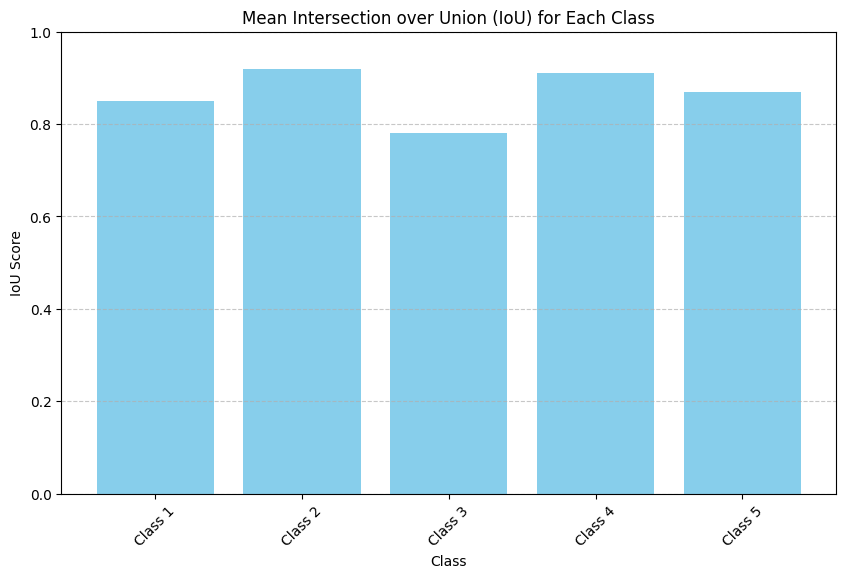

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming you have computed IoU scores for each class
# class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
# iou_scores = [0.85, 0.92, 0.78, 0.91, 0.87]  # IoU scores for each class

# # Plotting IoU scores for each class
# plt.figure(figsize=(10, 6))
# plt.bar(class_names, iou_scores, color='skyblue')
# plt.title('Mean Intersection over Union (IoU) for Each Class')
# plt.xlabel('Class')
# plt.ylabel('IoU Score')
# plt.ylim(0, 1)  # Set y-axis limits to IoU range (0 to 1)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()
